In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [134]:
sheet_id = '1C9wh8HLncoi4_1OCB-UFmyoMW0h4QYcWswGwC1Qxeik'
df = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv")
df.head()

,Name,category,product_id,user_id,date,time,Email,rating,Feedback,Sentiment,Id,label
0,Emma Johnson,Electronics,938562,emma96,2023-04-27,13:23,emma.johnson@example.com,4,jaideepak.s.h.2020.cse@ritchennai.edu.inThe pr...,NaN,1,0
1,John Smith,Home,284739,johnsmith,2023-04-30,9:47,john.smith@example.com,3,@user when a father is dysfunctional and is so...,NaN,2,0
2,Sarah Lee,Clothing,672915,sarah_lee,2023-04-26,18:12,sarah.lee@example.com,5,@love the design and quality! #good,NaN,3,0
3,Alex Chen,Beauty,583029,alexc123,2023-05-01,21:01,alex.chen@example.com,4,"Works well, but the smell is too strong. #best",NaN,4,0
4,Rachel Kim,Sports,109385,rachelk,2023-04-28,15:37,rachel.kim@example.com,5,Great product! I use it every day! #useful,NaN,5,0


In [135]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        113 non-null    object 
 1   category    113 non-null    object 
 2   product_id  113 non-null    object 
 3   user_id     113 non-null    object 
 4   date        113 non-null    object 
 5   time        113 non-null    object 
 6   Email       113 non-null    object 
 7   rating      113 non-null    int64  
 8   Feedback    113 non-null    object 
 9   Sentiment   0 non-null      float64
 10  Id          113 non-null    int64  
 11  label       113 non-null    int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 10.7+ KB


In [136]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [137]:
df.head()

,Name,category,product_id,user_id,date,time,Email,rating,Feedback,Sentiment,Id,label
0,Emma Johnson,Electronics,938562,emma96,2023-04-27,13:23,emma.johnson@example.com,4,jaideepak.s.h.2020.cse@ritchennai.edu.inThe pr...,NaN,1,0
1,John Smith,Home,284739,johnsmith,2023-04-30,9:47,john.smith@example.com,3,@user when a father is dysfunctional and is so...,NaN,2,0
2,Sarah Lee,Clothing,672915,sarah_lee,2023-04-26,18:12,sarah.lee@example.com,5,@love the design and quality! #good,NaN,3,0
3,Alex Chen,Beauty,583029,alexc123,2023-05-01,21:01,alex.chen@example.com,4,"Works well, but the smell is too strong. #best",NaN,4,0
4,Rachel Kim,Sports,109385,rachelk,2023-04-28,15:37,rachel.kim@example.com,5,Great product! I use it every day! #useful,NaN,5,0


In [138]:
# remove mention handles (@user)
df['clean_Feedback'] = np.vectorize(remove_pattern)(df['Feedback'], "@[\w]*")

In [139]:
df.head()

,Name,category,product_id,user_id,date,time,Email,rating,Feedback,Sentiment,Id,label,clean_Feedback
0,Emma Johnson,Electronics,938562,emma96,2023-04-27,13:23,emma.johnson@example.com,4,jaideepak.s.h.2020.cse@ritchennai.edu.inThe pr...,NaN,1,0,jaideepak.s.h.2020.cse.edu.inThe product works...
1,John Smith,Home,284739,johnsmith,2023-04-30,9:47,john.smith@example.com,3,@user when a father is dysfunctional and is so...,NaN,2,0,when a father is dysfunctional and is so self...
2,Sarah Lee,Clothing,672915,sarah_lee,2023-04-26,18:12,sarah.lee@example.com,5,@love the design and quality! #good,NaN,3,0,the design and quality! #good
3,Alex Chen,Beauty,583029,alexc123,2023-05-01,21:01,alex.chen@example.com,4,"Works well, but the smell is too strong. #best",NaN,4,0,"Works well, but the smell is too strong. #best"
4,Rachel Kim,Sports,109385,rachelk,2023-04-28,15:37,rachel.kim@example.com,5,Great product! I use it every day! #useful,NaN,5,0,Great product! I use it every day! #useful


In [140]:
# remove special characters, numbers and punctuations
df['clean_Feedback'] = df['clean_Feedback'].str.replace("[^a-zA-Z#]", " ")
df.head()

,Name,category,product_id,user_id,date,time,Email,rating,Feedback,Sentiment,Id,label,clean_Feedback
0,Emma Johnson,Electronics,938562,emma96,2023-04-27,13:23,emma.johnson@example.com,4,jaideepak.s.h.2020.cse@ritchennai.edu.inThe pr...,NaN,1,0,jaideepak s h cse edu inThe product works...
1,John Smith,Home,284739,johnsmith,2023-04-30,9:47,john.smith@example.com,3,@user when a father is dysfunctional and is so...,NaN,2,0,when a father is dysfunctional and is so self...
2,Sarah Lee,Clothing,672915,sarah_lee,2023-04-26,18:12,sarah.lee@example.com,5,@love the design and quality! #good,NaN,3,0,the design and quality #good
3,Alex Chen,Beauty,583029,alexc123,2023-05-01,21:01,alex.chen@example.com,4,"Works well, but the smell is too strong. #best",NaN,4,0,Works well but the smell is too strong #best
4,Rachel Kim,Sports,109385,rachelk,2023-04-28,15:37,rachel.kim@example.com,5,Great product! I use it every day! #useful,NaN,5,0,Great product I use it every day #useful


In [141]:
# remove short words
df['clean_Feedback'] = df['clean_Feedback'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,Name,category,product_id,user_id,date,time,Email,rating,Feedback,Sentiment,Id,label,clean_Feedback
0,Emma Johnson,Electronics,938562,emma96,2023-04-27,13:23,emma.johnson@example.com,4,jaideepak.s.h.2020.cse@ritchennai.edu.inThe pr...,NaN,1,0,jaideepak inThe product works great
1,John Smith,Home,284739,johnsmith,2023-04-30,9:47,john.smith@example.com,3,@user when a father is dysfunctional and is so...,NaN,2,0,when father dysfunctional selfish drags kids i...
2,Sarah Lee,Clothing,672915,sarah_lee,2023-04-26,18:12,sarah.lee@example.com,5,@love the design and quality! #good,NaN,3,0,design quality #good
3,Alex Chen,Beauty,583029,alexc123,2023-05-01,21:01,alex.chen@example.com,4,"Works well, but the smell is too strong. #best",NaN,4,0,Works well smell strong #best
4,Rachel Kim,Sports,109385,rachelk,2023-04-28,15:37,rachel.kim@example.com,5,Great product! I use it every day! #useful,NaN,5,0,Great product every #useful


In [142]:
# individual words considered as tokens
tokenized_tweet = df['clean_Feedback'].apply(lambda x: x.split())
tokenized_tweet.head()

0            [jaideepak, inThe, product, works, great]
1    [when, father, dysfunctional, selfish, drags, ...
2                             [design, quality, #good]
3                  [Works, well, smell, strong, #best]
4                     [Great, product, every, #useful]
Name: clean_Feedback, dtype: object

In [143]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0              [jaideepak, inth, product, work, great]
1    [when, father, dysfunct, selfish, drag, kid, i...
2                             [design, qualiti, #good]
3                   [work, well, smell, strong, #best]
4                        [great, product, everi, #use]
Name: clean_Feedback, dtype: object

In [144]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_Feedback'] = tokenized_tweet
df.head()

,Name,category,product_id,user_id,date,time,Email,rating,Feedback,Sentiment,Id,label,clean_Feedback
0,Emma Johnson,Electronics,938562,emma96,2023-04-27,13:23,emma.johnson@example.com,4,jaideepak.s.h.2020.cse@ritchennai.edu.inThe pr...,NaN,1,0,jaideepak inth product work great
1,John Smith,Home,284739,johnsmith,2023-04-30,9:47,john.smith@example.com,3,@user when a father is dysfunctional and is so...,NaN,2,0,when father dysfunct selfish drag kid into dys...
2,Sarah Lee,Clothing,672915,sarah_lee,2023-04-26,18:12,sarah.lee@example.com,5,@love the design and quality! #good,NaN,3,0,design qualiti #good
3,Alex Chen,Beauty,583029,alexc123,2023-05-01,21:01,alex.chen@example.com,4,"Works well, but the smell is too strong. #best",NaN,4,0,work well smell strong #best
4,Rachel Kim,Sports,109385,rachelk,2023-04-28,15:37,rachel.kim@example.com,5,Great product! I use it every day! #useful,NaN,5,0,great product everi #use


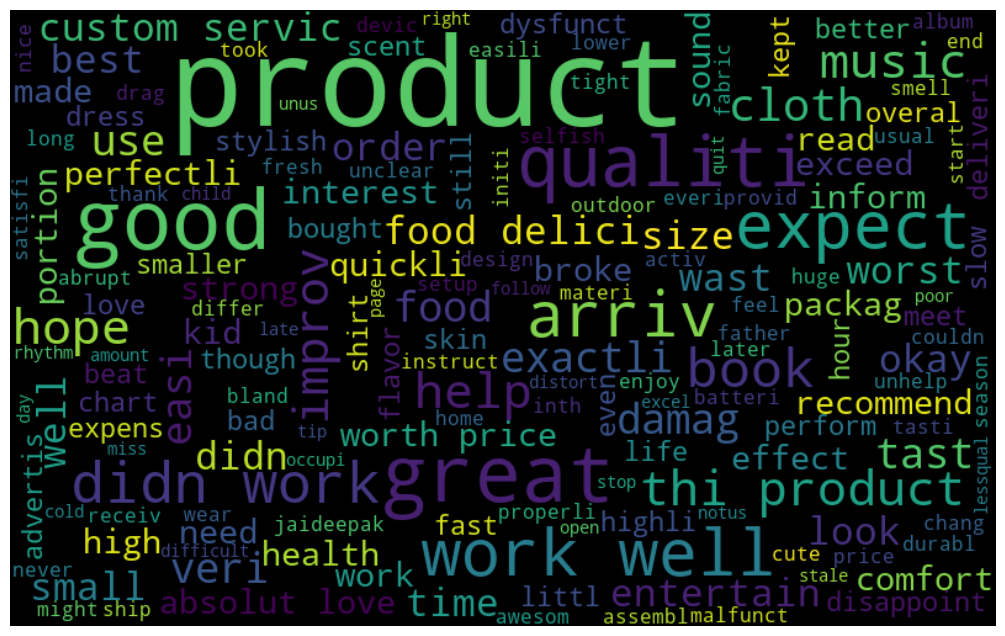

In [145]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_Feedback']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

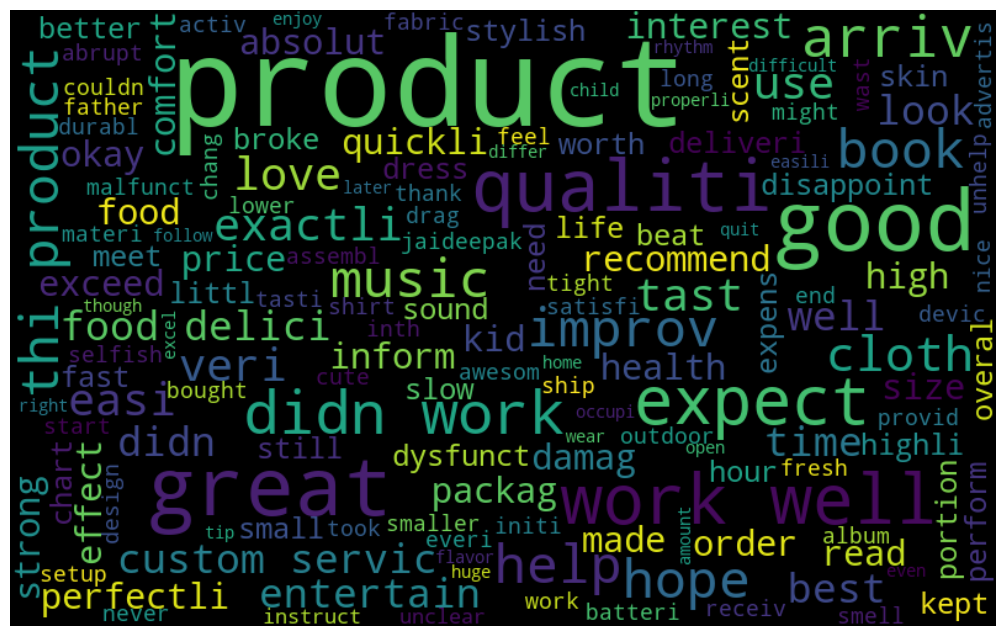

In [146]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_Feedback'][df['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

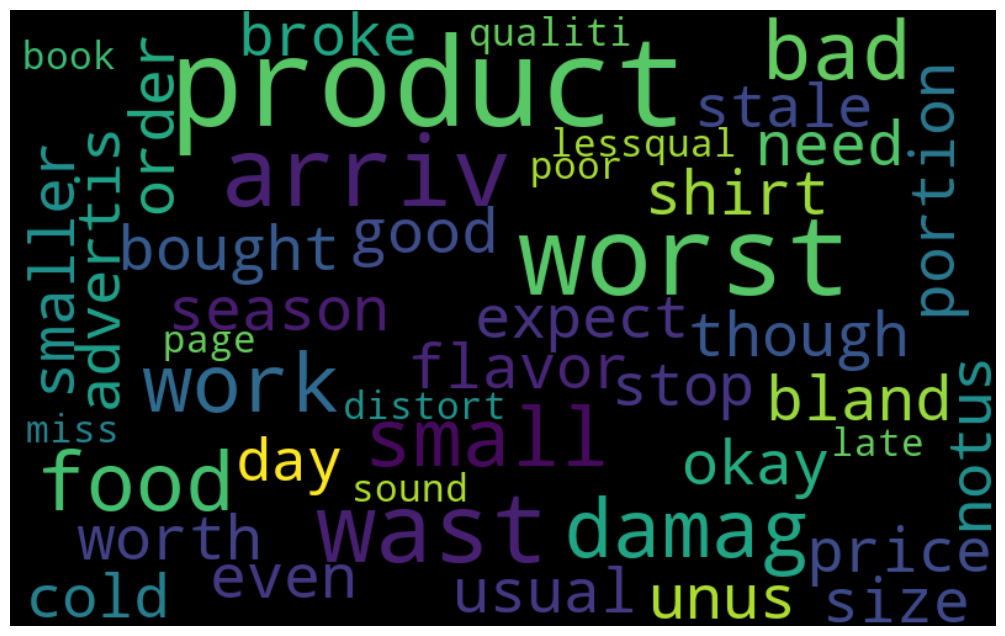

In [147]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df['clean_Feedback'][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [148]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags 

In [149]:
# extract hashtags from positive feedback
ht_positive = hashtag_extract(df['clean_Feedback'][df['label']==0])

# extract hashtags from negative feedback
ht_negative = hashtag_extract(df['clean_Feedback'][df['label']==1])


In [150]:
ht_positive[:5]

[[], [], ['good'], ['best'], ['use']]

In [151]:
# unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [152]:
ht_positive[:5]

['good', 'best', 'use', 'awesom', 'good']

In [153]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,good,4
1,best,4
2,use,1
3,awesom,1


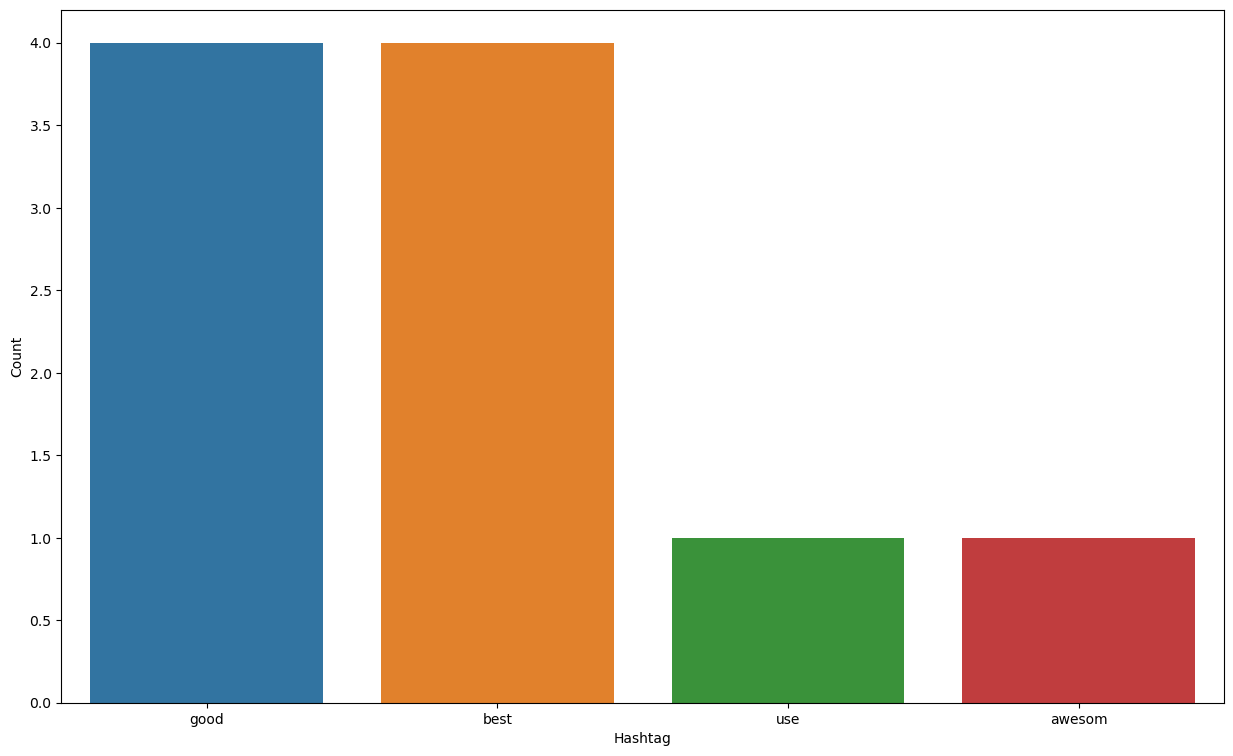

In [154]:
# select top postive hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [155]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,wast,3
1,worst,4
2,bad,2
3,notus,1
4,lessqual,1


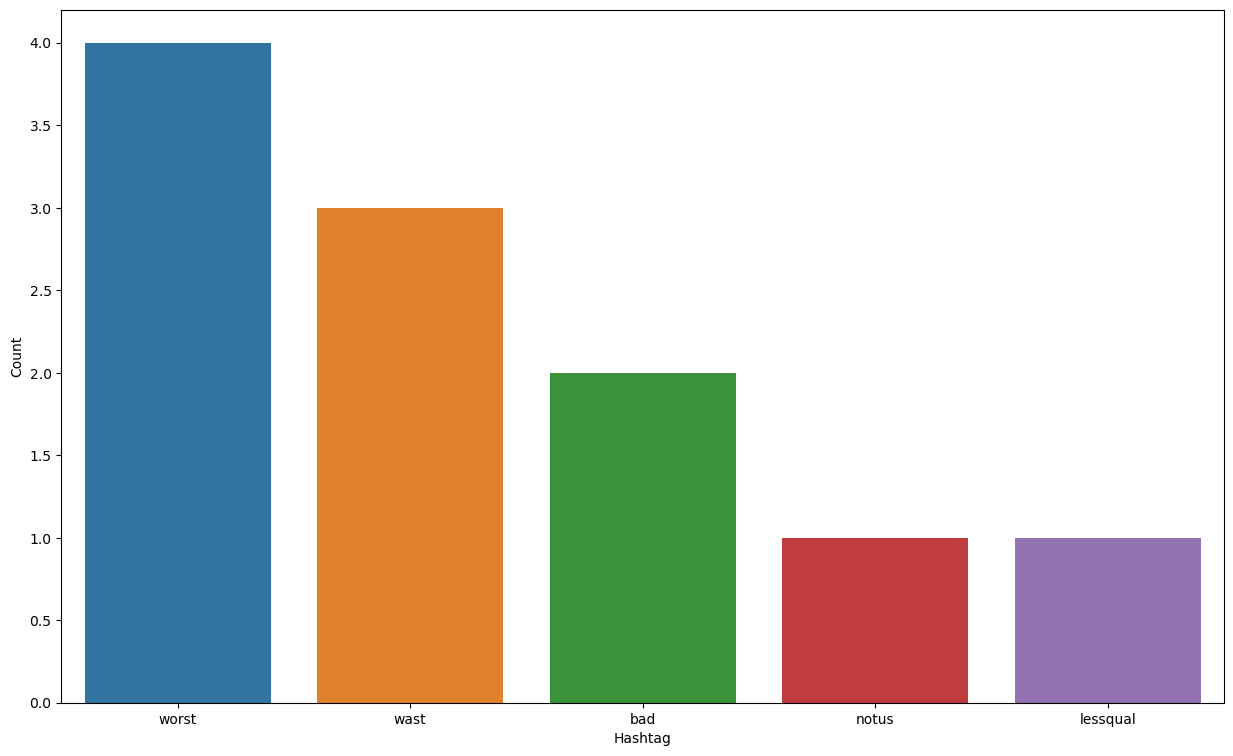

In [156]:
# select top negative hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

bow[0].toarray()

In [157]:

# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_Feedback'])

In [158]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [160]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [161]:
# testing
pred = model.predict(x_test)
f1_score(y_test, pred)

0.0

In [162]:
accuracy_score(y_test,pred)

0.8620689655172413

In [163]:
# use probability to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(int)

f1_score(y_test, pred)

0.5714285714285715